#Mount Drive before analyse

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load Data from Google Drive
April=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_April_2019.csv")
August=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_August_2019.csv")
December=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_December_2019.csv")
February=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_February_2019.csv")
January=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_January_2019.csv")
July=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_July_2019.csv")
June=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_June_2019.csv")
March=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_March_2019.csv")
May=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_May_2019.csv")
November=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_November_2019.csv")
September=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_September_2019.csv")
October=pd.read_csv("/content/drive/MyDrive/EDA/salesData/Sales_October_2019.csv")

###Concate all loaded DataSet

In [4]:
dataSet=pd.concat([January,February,March,April,March,June,July,August,September,October,November,December],axis=0)

In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185441 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          184907 non-null  object
 1   Product           184907 non-null  object
 2   Quantity Ordered  184907 non-null  object
 3   Price Each        184907 non-null  object
 4   Order Date        184907 non-null  object
 5   Purchase Address  184907 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Drop the rows which contains all rows in the particular column is null**

In [6]:
dataSet=dataSet[~(dataSet["Order ID"].isna())]

**Check which product sell most**

In [7]:
totalSales=dataSet["Product"].value_counts()

In [8]:
totalSales

USB-C Charging Cable          21789
Lightning Charging Cable      21481
AA Batteries (4-pack)         20431
AAA Batteries (4-pack)        20392
Wired Headphones              18664
Apple Airpods Headphones      15513
Bose SoundSport Headphones    13343
27in FHD Monitor               7427
iPhone                         6740
27in 4K Gaming Monitor         6167
34in Ultrawide Monitor         6161
Google Phone                   5509
Flatscreen TV                  4760
Macbook Pro Laptop             4642
ThinkPad Laptop                4104
20in Monitor                   4088
Vareebadd Phone                2053
LG Washing Machine              666
LG Dryer                        620
Product                         357
Name: Product, dtype: int64

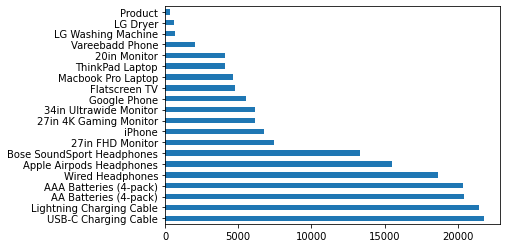

In [9]:
totalSales.plot.barh()

In [10]:
plotValues=totalSales[dataSet["Product"].unique()]

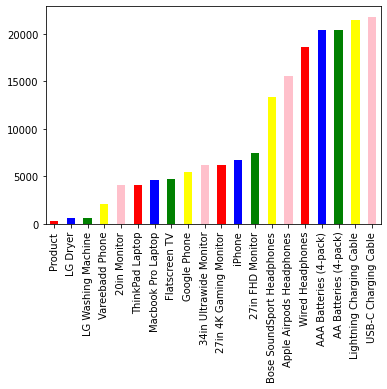

In [11]:
plotValues.sort_values(ascending=True).plot.bar(color=["red","blue","green","yellow","pink"])

In this case we can see that **USB-C** charger has huge sales✈\

In [12]:
dataSet

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


**How Much amount of USB Type c Charger they sell**

Steps:

    ->Check the type of "Product" and change the data type which we want to analyse

    ->In this case I've change this as String as  numeric

In [13]:
dataSet["Price Each"].dtype

dtype('O')

In [14]:
##Check any Non Numeric Values

In [15]:
dataSet["Price Each"].value_counts()

11.95         21789
14.95         21481
3.84          20431
2.99          20392
11.99         18664
150           15418
99.99         13343
149.99         7427
700            6705
389.99         6167
379.99         6161
600            5477
300            4741
1700           4620
999.99         4104
109.99         4088
400            2044
600.0          1318
Price Each      357
150.0            95
700.0            35
1700.0           22
300.0            19
400.0             9
Name: Price Each, dtype: int64

I found that There is 357 columns contains values as **Price Each**

In [16]:
#Check which products contains price value as Price Value
dataSet[dataSet["Price Each"]=="Price Each"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**I found there is more than 357 rows contains no values in specic columns they contai on as column names as values
In this case there is no use of these specific rows**

So I drop those rows in this case

In [17]:
#New Dataset after droping above rows
newData=dataSet[~(dataSet["Order ID"]=="Order ID")]

In [18]:
newData

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [19]:
#Now check the values in Price Each Columns
newData["Price Each"].value_counts()

11.95     21789
14.95     21481
3.84      20431
2.99      20392
11.99     18664
150       15418
99.99     13343
149.99     7427
700        6705
389.99     6167
379.99     6161
600        5477
300        4741
1700       4620
999.99     4104
109.99     4088
400        2044
600.0      1318
150.0        95
700.0        35
1700.0       22
300.0        19
400.0         9
Name: Price Each, dtype: int64

In [20]:
#Change Data Type
newData["Price Each"]=newData["Price Each"].astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#Again check Data Type
newData["Price Each"].dtype

dtype('float64')

In [22]:

newData[newData["Product"]=="USB-C Charging Cable"]["Price Each"].value_counts()

11.95    21789
Name: Price Each, dtype: int64

In [23]:
USBType_C=newData[newData["Product"]=="USB-C Charging Cable"]

In [24]:
usbSales=USBType_C["Price Each"].sum()

In [25]:
#Percentage of USB Type c in total amount of sales
totalSales=newData["Price Each"].sum()
(usbSales/totalSales)*100

0.7668295608479949

**I found the revenue of USB sale in total sales is Only 0.7 Percentage**

*This One is not well*

**Create New Derived Matrics using Quantity Ordered and Price Each**

Steps✈

    ->Change The Data Type of Ordered Column
    
    ->Apply multiplication of Price Each Column and Quantity Ordered

In the name Total Amount Of sales

In [26]:
#Check the data type of columns
newData["Quantity Ordered"].dtype

dtype('O')

In [27]:
#Change the data Type
newData["Quantity Ordered"]=newData["Quantity Ordered"].astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#Again check the Type of column
newData["Quantity Ordered"].dtype

dtype('int64')

In [29]:
Total_Amount=newData["Quantity Ordered"]*newData["Price Each"]

In [30]:
newData["Amount Of Sales"]=Total_Amount

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
newData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount Of Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99


In [32]:

totalSalesOfAllProduct=newData.pivot_table(index="Product",values="Amount Of Sales",aggfunc=np.sum)

In [33]:
#Check which product has huge sales amount wise
totalSalesOfAllProduct

,Amount Of Sales
Product,
20in Monitor,452608.85
27in 4K Gaming Monitor,2410528.19
27in FHD Monitor,1120575.29
34in Ultrawide Monitor,2347958.21
AA Batteries (4-pack),105477.12
AAA Batteries (4-pack),91386.36
Apple Airpods Headphones,2343450.00
Bose SoundSport Headphones,1347865.20
Flatscreen TV,1434600.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


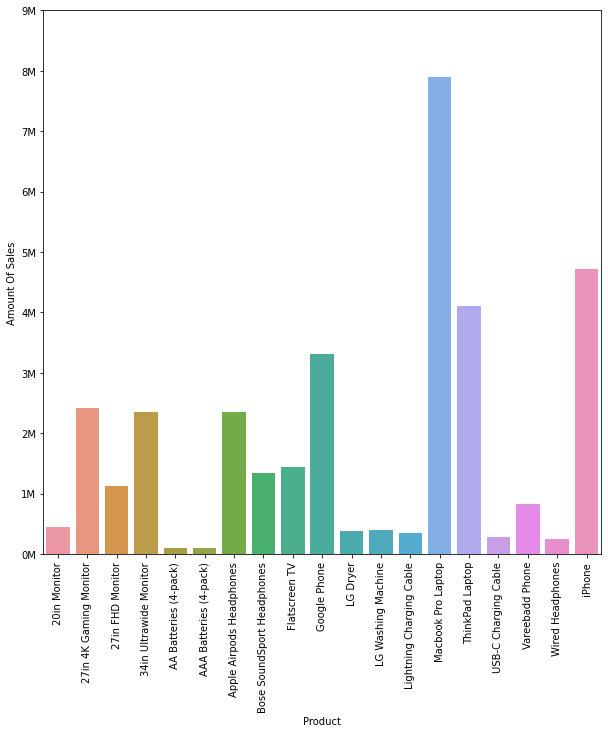

In [34]:
plt.figure(figsize=(10,10))
sb.barplot(totalSalesOfAllProduct.index,totalSalesOfAllProduct["Amount Of Sales"])
#plt.xticks(rotation=90,fon "Green")
ticks = np.arange(0, 10000000,1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90)
plt.show()

####I Found that the Sales of Macbook is higher than any other product as Amount Wise

**Know What is the Percentage of sales of MacBook**

In [35]:
totalSales

33955205.07999999

In [36]:
macSales=totalSalesOfAllProduct.index=="Macbook Pro Laptop"

In [37]:
(totalSalesOfAllProduct[macSales]/totalSales)*100

,Amount Of Sales
Product,
Macbook Pro Laptop,23.255639


##The sale of Macbook pro is **23%** in total sales

**Calculate Total percentage of Sales for All products**

In [38]:
percentageOfTotalSales=(totalSalesOfAllProduct["Amount Of Sales"]/totalSales)*100

In [39]:
totalSalesOfAllProduct["Percentage_Of_Total_Sales"]=percentageOfTotalSales

In [40]:
totalSalesOfAllProduct

,Amount Of Sales,Percentage_Of_Total_Sales
Product,,
20in Monitor,452608.85,1.332959
27in 4K Gaming Monitor,2410528.19,7.099142
27in FHD Monitor,1120575.29,3.300158
34in Ultrawide Monitor,2347958.21,6.914870
AA Batteries (4-pack),105477.12,0.310636
AAA Batteries (4-pack),91386.36,0.269138
Apple Airpods Headphones,2343450.00,6.901593
Bose SoundSport Headphones,1347865.20,3.969539
Flatscreen TV,1434600.00,4.224978


#Check State Wise and City Wise Sales

**Analyse which state contains huge Iphone Sales**

In [41]:
Address=newData["Purchase Address"].apply(lambda x:x[:-6])

In [42]:
State=Address.apply(lambda x:x[-2:])

In [43]:
newData["State"]=State

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
#Count number of states in sales data
newData.State.value_counts()

CA    73901
NY    24589
TX    24508
MA    19782
GA    14795
WA    14693
OR     9861
ME     2421
Name: State, dtype: int64

In [45]:
stateWiseIphoneSales=newData[newData["Product"]=="iPhone"]

In [46]:
stateWiseData=stateWiseIphoneSales["State"].value_counts()

In [47]:
def changeNameOfStates(string):
  if string=="CA":
    return "California"
  elif string=="TX":
    return "Texas"
  elif string=="NY":
    return "New York"
  elif string=="MA":
    return "Massachusetts"
  elif string=="OR":
    return "Orlando"
  elif string=="ME":
    return "Maine"
  elif string=="WA":
    return "Wasington DC"
  elif string=="GA":
    return "Georgia"


In [48]:
newData["State"]=newData["State"].apply(lambda x:changeNameOfStates(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
newData

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount Of Sales,State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,Massachusetts
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,Orlando
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,California
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,California
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,Texas
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95,California
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68,California
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00,Wasington DC
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99,Texas


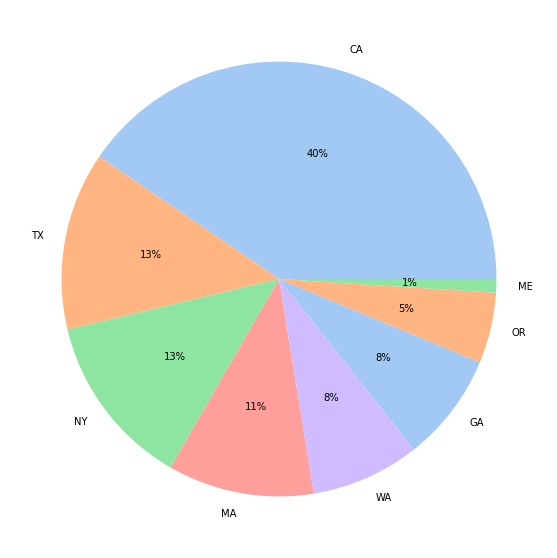

['CA' 'TX' 'NY' 'MA' 'WA' 'GA' 'OR' 'ME']


In [50]:
#Visualize the distribution of data

labels=np.array(stateWiseData.index)
plt.figure(figsize=(10,10))
colors = sb.color_palette('pastel')[0:5]
plt.pie(stateWiseData,labels=labels,colors = colors,autopct='%.0f%%')
plt.show()
print(labels)

The Pie Chart Explains  the ***California*** State has Huge Sales of Iphone

In [51]:
#Check what is the percentage of Iphone sales In california against all state sales of Iphone
TotalIphonesales=stateWiseIphoneSales['Amount Of Sales'].sum()

In [52]:
californiaIphoneSales=stateWiseIphoneSales[stateWiseIphoneSales["State"]=='California']
californiaSales=californiaIphoneSales["Amount Of Sales"].sum()

In [53]:
round((californiaSales/TotalIphonesales)*100)

0

*According to this details out of **40%** of Iphone get sale in Califorinia Alone for the Particular Store*

**City wise Iphone sales Data**

In [54]:
def getCity(string):
  return string.split(", ")[1]


In [55]:
#Get City 
address=newData["Purchase Address"].apply(lambda x:x[:-10])
newData["City"]=address.apply(lambda x:getCity(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
newData["Product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [57]:
newData["City"].value_counts()

San Francisco    44408
Los Angeles      29493
New York City    24589
Boston           19782
Atlanta          14795
Seattle          14693
Dallas           14602
Portland         12282
Austin            9906
Name: City, dtype: int64

According the data **San Fancisco** has huge sales 

#Lets check which city has more Mobile sales ans Laptop sales

**Mobiles sales**

  In this case This particularr store only sell 'iPhone','Google Phone',so we analysze only these details 

In [58]:
phonesSales=newData[newData["Product"].isin(['iPhone','Google Phone'])]

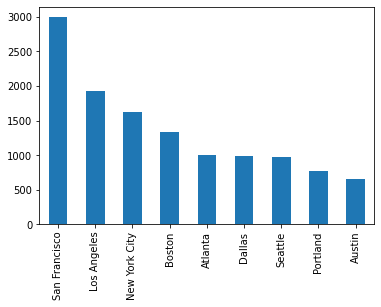

In [59]:
phonesSales["City"].value_counts().plot.bar()

**The Huge phone sales in San Fransisco**

In [60]:
TotalOfPhones=phonesSales['Product'].value_counts().sum()

In [61]:
PhoneSalesSplit=phonesSales.pivot_table(index="City",values="Amount Of Sales",columns="Product",aggfunc="sum")

Below this is Data Driven Matrices

In [62]:
PhoneSalesSplit["TotalSales"]=PhoneSalesSplit["Google Phone"]+PhoneSalesSplit["iPhone"]

In [63]:
PhoneSalesSplit

Product,Google Phone,iPhone,TotalSales
City,,,
Atlanta,272400.0,382900.0,655300.0
Austin,162000.0,268100.0,430100.0
Boston,359400.0,513800.0,873200.0
Dallas,284400.0,357000.0,641400.0
Los Angeles,511800.0,752500.0,1264300.0
New York City,448200.0,611100.0,1059300.0
Portland,207600.0,296800.0,504400.0
San Francisco,806400.0,1159200.0,1965600.0
Seattle,256800.0,382200.0,639000.0


In [64]:
PhoneSalesSplit["GooglePhoneSales"]=PhoneSalesSplit["Google Phone"]/PhoneSalesSplit["TotalSales"]
PhoneSalesSplit["Iphone Sales"]=PhoneSalesSplit["iPhone"]/PhoneSalesSplit["TotalSales"]

In [65]:
percentageOfsales=PhoneSalesSplit.pivot_table(index="City",values=["GooglePhoneSales","Iphone Sales"])

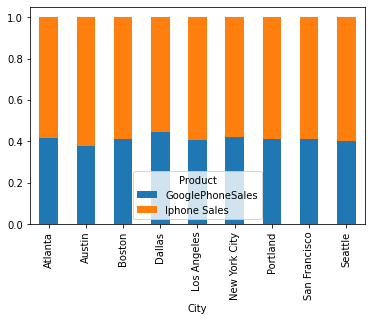

In [66]:
percentageOfsales.plot.bar(stacked=True)

**The above Stacked Graph show the Which phone get More sale in Each City**

In [67]:
#

**Lets Analyse Laptop sales of Each month**

In [68]:
#Get Month Order Date data 
#Check data type of Series
newData["Order Date"].dtype

dtype('O')

In [69]:
#Change Data Type of date
newData["Order Date"]=pd.to_datetime(newData["Order Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
newData["Month"]=newData["Order Date"].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
newData

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount Of Sales,State,City,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,Massachusetts,Boston,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Orlando,Portland,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,California,San Francisco,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,California,Los Angeles,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Texas,Austin,1
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,California,San Francisco,12
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,California,Los Angeles,12
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,Wasington DC,Seattle,12
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,Texas,Dallas,12


In [72]:
monthlySalesData=newData.pivot_table(index="Month",values='Amount Of Sales',aggfunc="sum")

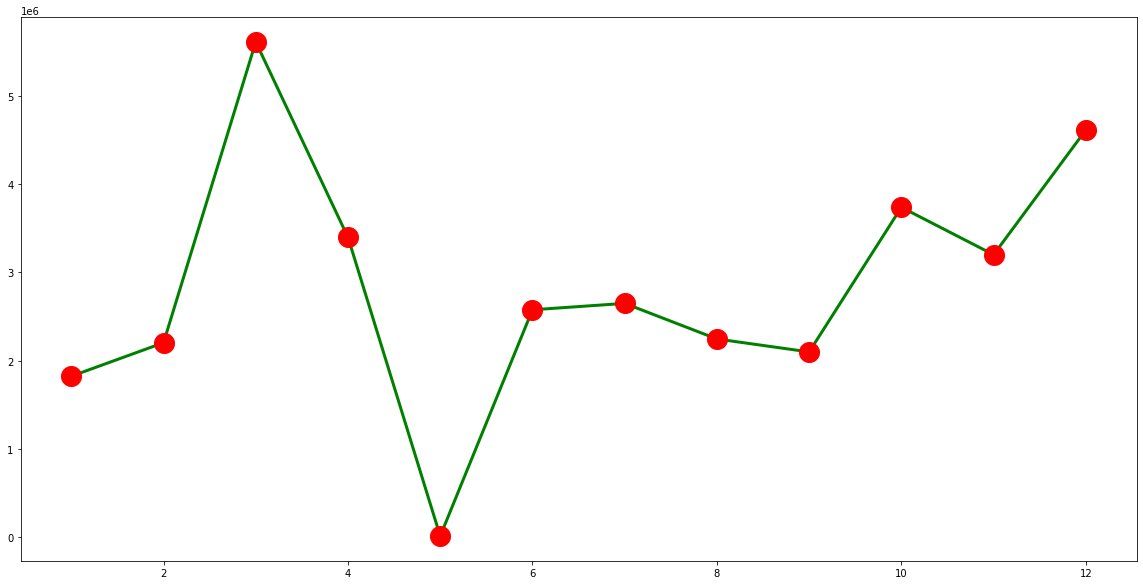

In [73]:
plt.figure(figsize=(20,10))
plt.plot(monthlySalesData,"go-",linewidth=3, markersize=20, mec = 'r', mfc = 'r')#markersize=30)

This Chart show March month Has Huge Sales After the march month the sales gets fall at the same time may month has huge fall in sales

**Lets check which hour attract more customer**

In [74]:
#Derive the hour data from Order Date
newData["Hour"]=newData["Order Date"].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
HourlySalesData=newData.pivot_table(index="Hour",values='Amount Of Sales',aggfunc="sum")

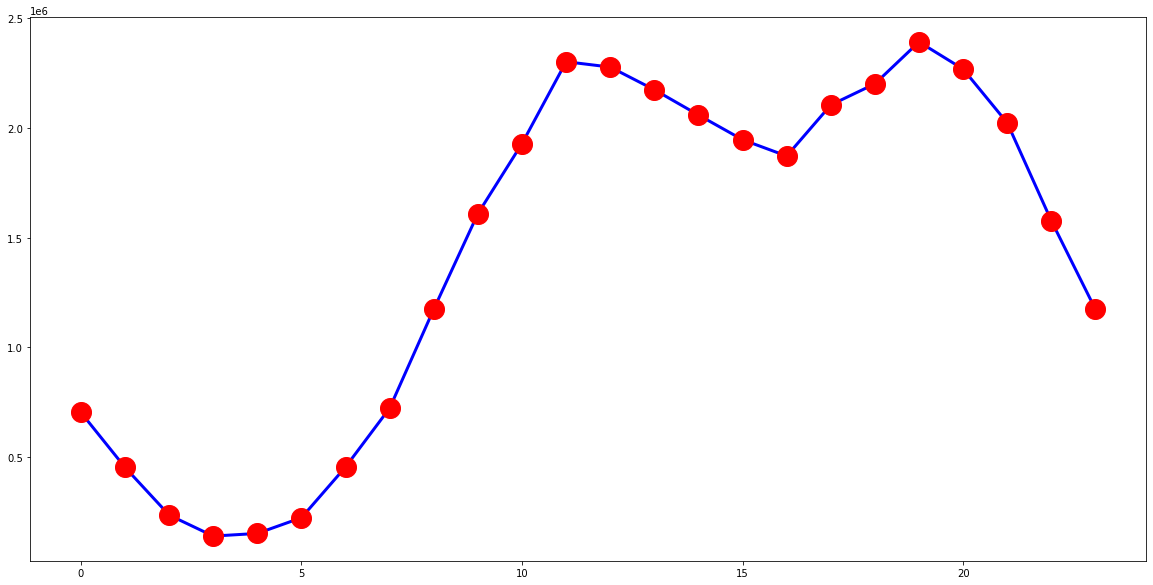

In [76]:
plt.figure(figsize=(20,10))
plt.plot(HourlySalesData,"bo-",linewidth=3, markersize=20, mec = 'r', mfc = 'r')

This Line Graph shown from 10Am  to 12AM has Hugh sale There is no specific time for sales it get order 24Hours,while seening this 2AM to 6AM Has Very less Sale,This is pe

**Which product get sell together More often?**

In [90]:
#Get which Order Id Occurs More than one time this details is enough for analyse the combination of purchase
oftenPurchaseData=newData[newData['Order ID'].duplicated(keep=False)]

In [91]:

oftenPurchaseData

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount Of Sales,State,City,Month,Hour
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,Texas,Austin,1,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99,Texas,Austin,1,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,California,Los Angeles,1,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52,California,Los Angeles,1,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00,New York,New York City,1,11
...,...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",11.99,Orlando,Portland,12,0
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",700.00,New York,New York City,12,8
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",14.95,New York,New York City,12,8
25076,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",379.99,Texas,Austin,12,22


In [92]:
newGroup=oftenPurchaseData.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

In [93]:
newGroup.head()

41              USB-C Charging Cable,Wired Headphones
42              USB-C Charging Cable,Wired Headphones
57     Apple Airpods Headphones,AA Batteries (4-pack)
58     Apple Airpods Headphones,AA Batteries (4-pack)
133                  Vareebadd Phone,Wired Headphones
Name: Product, dtype: object

In [103]:
frequency={}
for values in newGroup:
  toCalculateFrequency=(tuple((values).split(",")))
  if toCalculateFrequency in frequency:
    frequency[toCalculateFrequency]+=1
  else:
    frequency[toCalculateFrequency]=1

In [106]:
frequency[("Vareebadd Phone","USB-C Charging Cable","Wired Headphones")]

84